In [2]:
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [3]:
#Reading Data

X_train=pd.read_csv("Linear_X_Train.csv")
y_train=pd.read_csv("Linear_Y_Train.csv")
X_test=pd.read_csv("Linear_X_Test.csv")

In [4]:
X_train=X_train.values
y_train=y_train.values
X_test=X_test.values

In [5]:
X_train.shape

(3750, 1)

In [6]:
y_train.shape

(3750, 1)

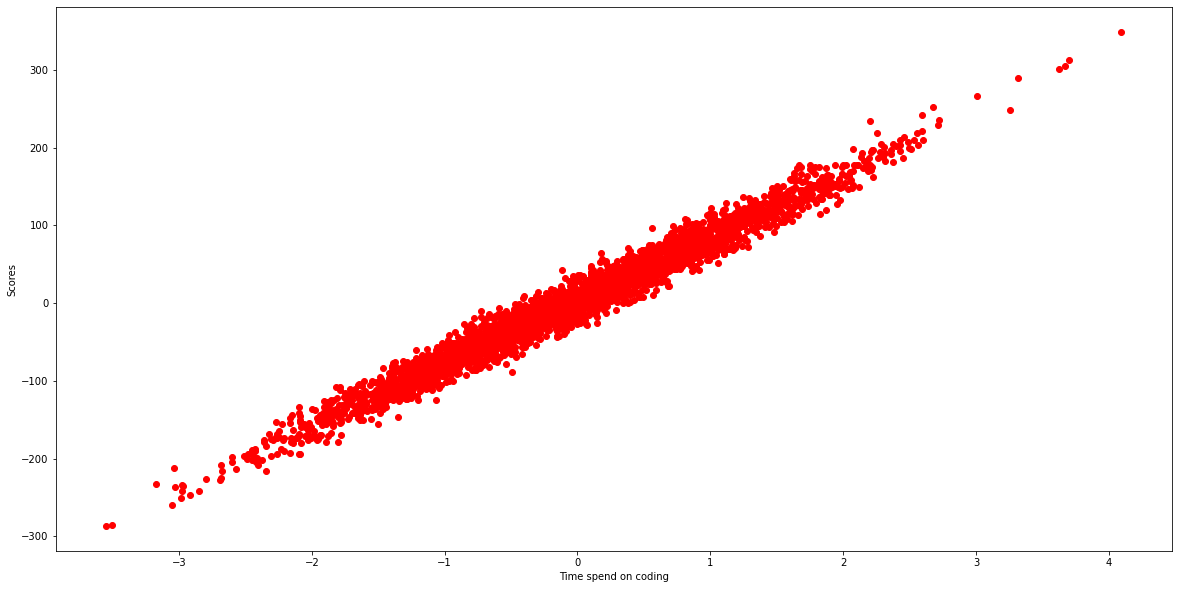

In [7]:
plt.scatter(X_train,y_train,color='red')
plt.xlabel("Time spend on coding")
plt.ylabel("Scores")
plt.show()

In [8]:
mu=X_train.mean()
sig=X_train.std()
X_train=(X_train-mu)/sig

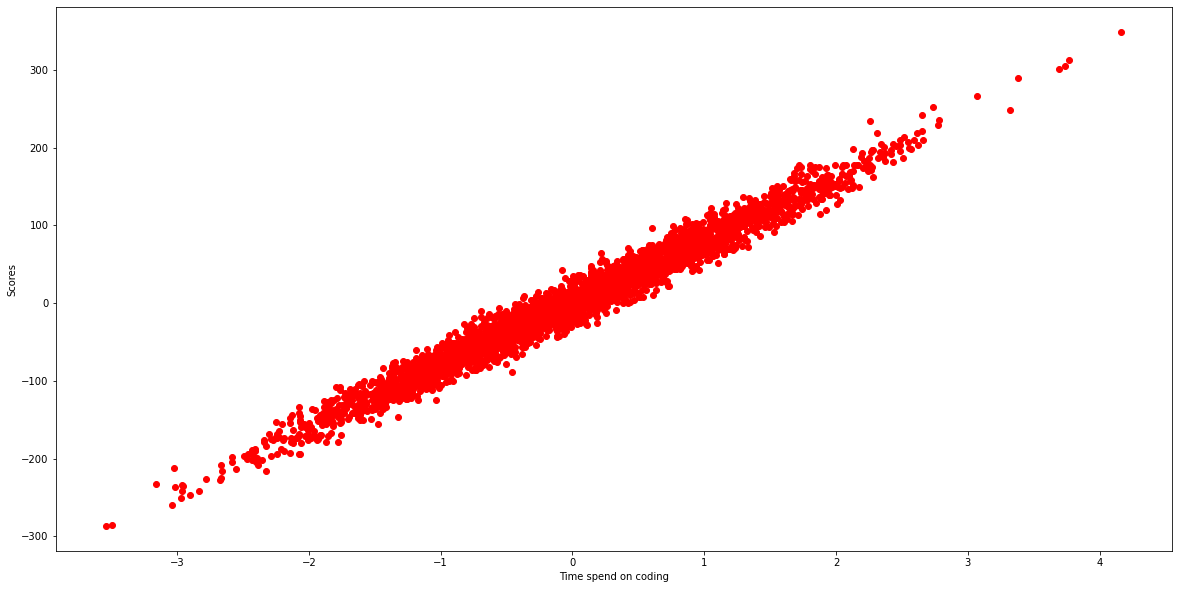

In [9]:
plt.scatter(X_train,y_train,color='red')
plt.xlabel("Time spend on coding")
plt.ylabel("Scores")
plt.show()

In [10]:
print(mu, sig)

-0.03779466168006855 0.9920801322508517


## LINEAR REGRESSION FORMULAS

In [11]:
def Hypothesis(x, theta):
    return theta[0] + theta[1] * x

In [12]:
def Error(x, y, theta):
    m = x.shape[0]
    total_error = 0.0
    for i in range(m):
        ypred_i = Hypothesis(x[i], theta)
        y_i = y[i]
        total_error += (ypred_i - y_i) ** 2
        
    return total_error/m

In [13]:
def Gradient(x, y, theta):
    grad = np.zeros(2)
    m = x.shape[0]
    for i in range(m):
        ypred_i = Hypothesis(x[i],theta)
        y_i = y[i]
        x_i = x[i]
        grad[0] += (ypred_i - y_i)
        grad[1] += (ypred_i- y_i) * x_i
        
    return grad/m #or grad/(2*m)

In [14]:
def GradientDescent(x, y, lr=0.01, max_itr=100):
    theta = np.zeros(2)
    error_list = []
    
    for i in range(max_itr):
        err = Error(x, y, theta)
        error_list.append(err[0])
        
        grad = Gradient(x, y, theta)
        
        theta[0] = theta[0] - lr * grad[0]
        theta[1] = theta[1] - lr * grad[1]
    return theta, error_list

In [15]:
opt_theta,error_list=GradientDescent(X_train,y_train)

In [16]:
print(opt_theta)
print(error_list[-10:])

[ 0.43355081 50.65765297]
[1236.9340837945635, 1216.1191115565673, 1195.7183572661063, 1175.7235779860214, 1156.126694813615, 1136.9197896163341, 1118.0951018324824, 1099.6450253355317, 1081.5621053608693, 1063.8390354937003]


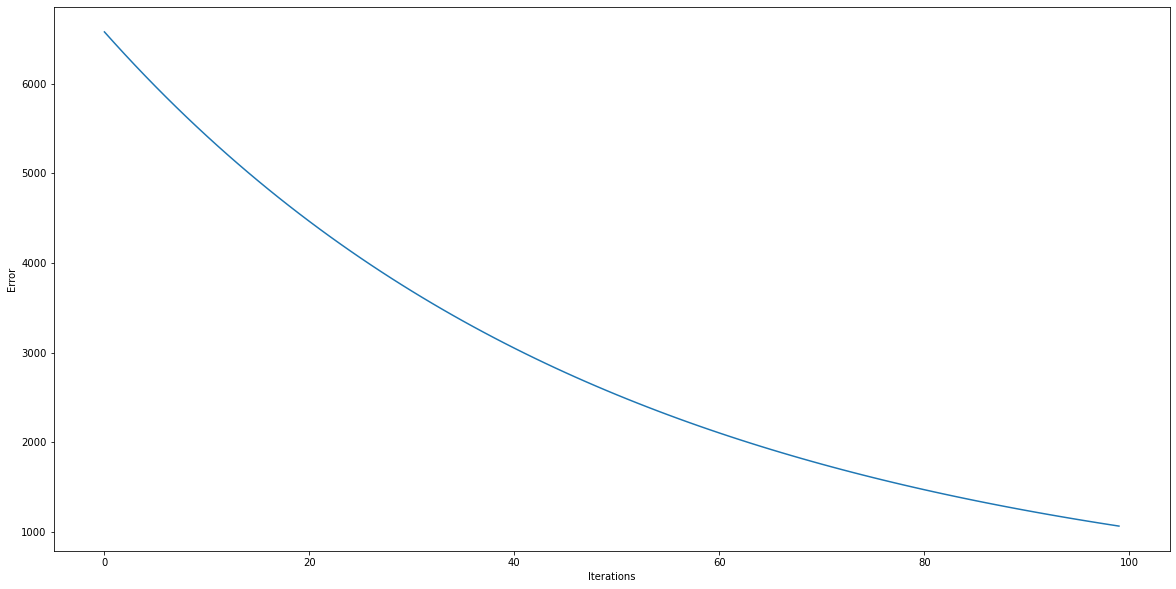

In [17]:
plt.plot(error_list)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.show()

In [18]:
opt_theta,error_list=GradientDescent(X_train,y_train,lr=0.1)

In [19]:
print(opt_theta)
print(error_list[-10:])

[ 0.6838508  79.90361453]
[190.95561642691717, 190.95560938658627, 190.9556036839193, 190.95559906475864, 190.95559532323833, 190.95559229260724, 190.95558983779603, 190.95558784939806, 190.95558623879643, 190.95558493420947]


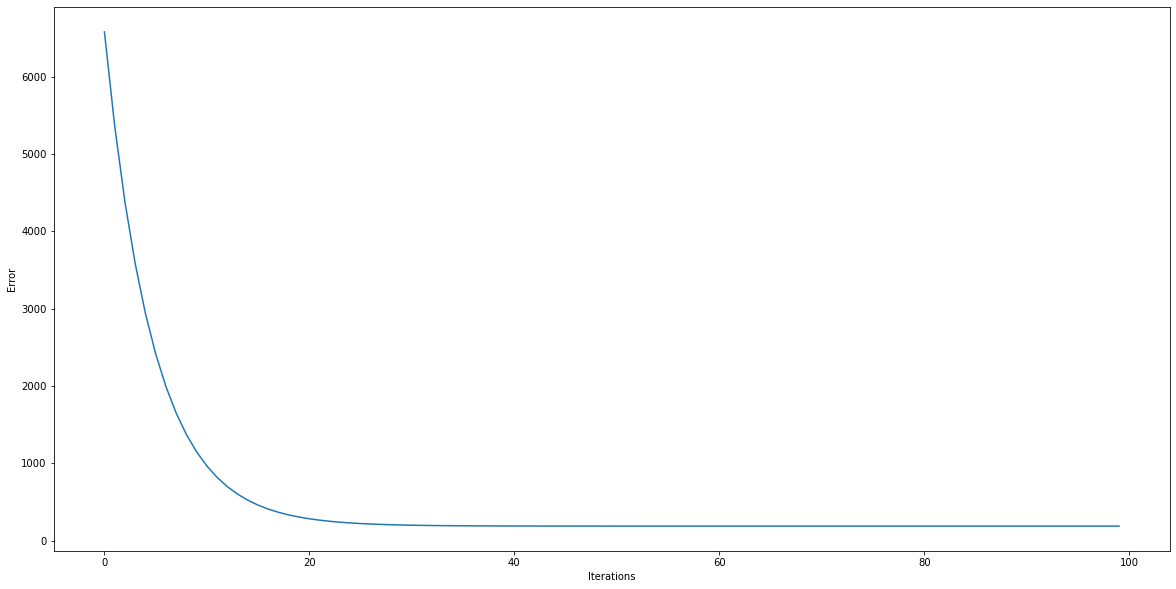

In [20]:
plt.plot(error_list)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.show()

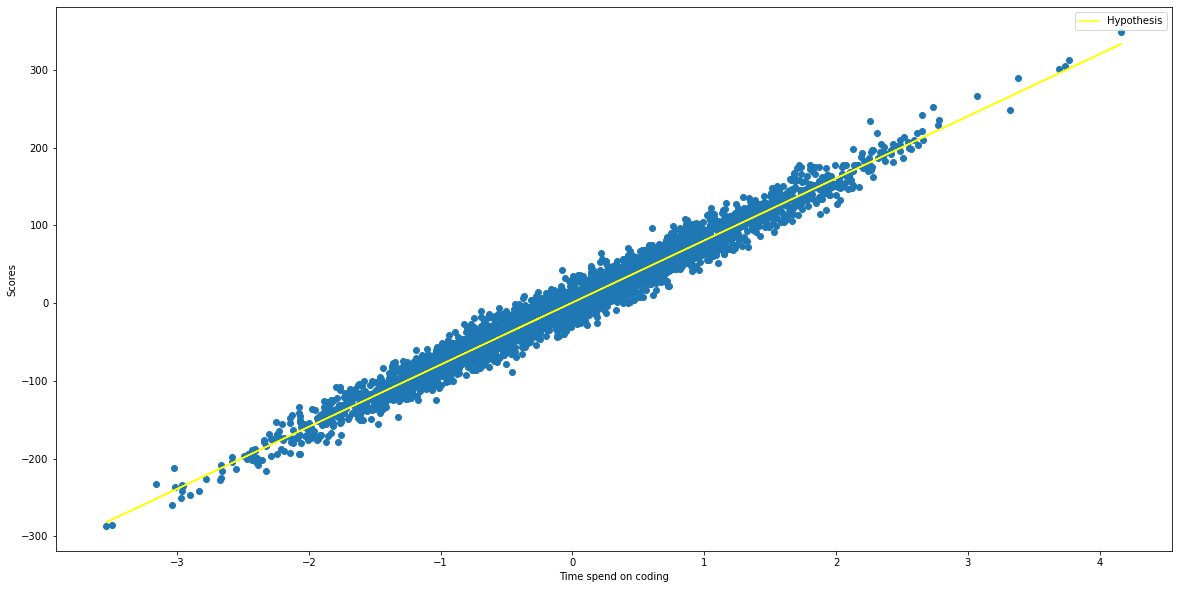

In [21]:
plt.scatter(X_train,y_train)
plt.plot(X_train, Hypothesis(X_train, opt_theta), color="yellow", label="Hypothesis")
plt.legend()
plt.xlabel("Time spend on coding")
plt.ylabel("Scores")
plt.show()

In [22]:
X_test = (X_test - mu) / sig

In [23]:
y_test = Hypothesis(X_test, opt_theta)

In [24]:
df = pd.DataFrame(data = y_test, columns = ["y"])

In [25]:
df.to_csv("y_test.csv", index = False)

In [26]:
y_pred_on_train = Hypothesis(X_train, opt_theta)

In [27]:
def r2_score(y, y_):
    num = np.sum((y-y_) ** 2)
    denom = np.sum((y-y.mean()) ** 2)
    score = 1 - (num / denom)
    return score

In [28]:
r2_score(y_train, y_pred_on_train)

0.9709612226971643